In [2]:

import matplotlib.pyplot as plt
import numpy as np

#plt.style.use("ultrasurfaces_plotstyle.mplstyle")

from toy_mc import generator
from importlib import reload

In [3]:
delta_msq_31 = 2.515e-3
sinsq_theta_23 = 0.565
# convert this to sin**2(2 \theta)
theta_23 = np.arcsin(np.sqrt(sinsq_theta_23))
sinsq_2theta_23 = np.sin(2 * theta_23)**2
default_pars = generator.OscPars(delta_msq_31, sinsq_2theta_23)

default_response = generator.Response(1., 0.05)

bin_edges = np.logspace(1., 2., 26)

In [4]:
reload(generator)

<module 'toy_mc.generator' from '/Users/trettin/projects/ultrasurface paper/ultrasurfaces/toy_mc/generator.py'>

In [5]:
gen = generator.Generator(int(1e5), default_response, default_pars)
h0 = gen.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [6]:
gen.detector_response

Response(mu=1.0, sigma=0.05)

In [7]:
h0.hist_unc

array([33.27865464, 42.88173896, 47.71337492, 47.11425666, 42.02782378,
       35.17651579, 27.08715798, 19.18073963, 12.34798327,  7.62172069,
        5.90569043,  6.82848046,  8.8537266 , 11.99022565, 14.84698804,
       17.91804394, 21.23276166, 23.61648686, 25.06541737, 26.60720462,
       27.9941615 , 29.05136418, 29.76893886, 29.47297667, 28.29365945])

In [8]:
h0.hist

array([1498.87361956, 2186.34441732, 2560.74771054, 2545.01646455,
       2194.18748098, 1786.12577227, 1296.06033434,  820.97200561,
        484.37749217,  285.79953276,  232.533083  ,  274.8573778 ,
        358.39629736,  512.42040384,  658.56441747,  821.91538256,
        993.17839205, 1076.56635367, 1108.6599225 , 1142.84873157,
       1181.0403309 , 1187.08608385, 1180.95923099, 1107.77760565,
        982.0564569 ])

In [9]:
from toy_mc.histogram import plot_histogram

[]

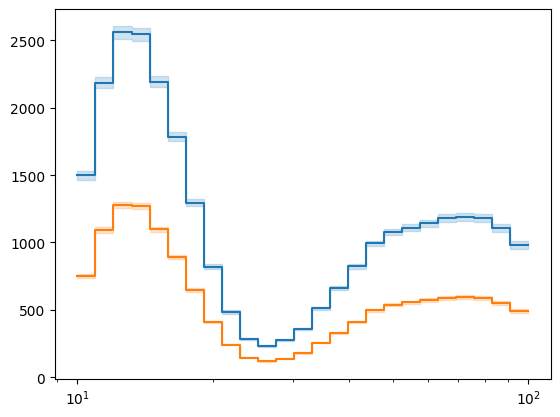

In [10]:
fig, ax = plt.subplots()
plot_histogram(h0, ax=ax)
plot_histogram(h0 / 2, ax=ax)
plt.semilogx()

In [11]:
gen.events

,true_energy,true_cos(zen),weights_pre_detector,reco_energy,weights
0,12.290679,-1.0,0.972968,13.180859,0.972968
1,16.052763,-1.0,0.678562,17.195065,0.678562
2,28.319770,-1.0,0.034723,30.744905,0.034723
3,110.861260,-1.0,0.873582,74.040605,0.873582
4,93.481569,-1.0,0.825452,79.400554,0.825452
...,...,...,...,...,...
99995,9.176090,-1.0,0.092677,8.468000,0.092677
99996,10.661602,-1.0,0.618907,10.480433,0.618907
99997,10.404811,-1.0,0.527323,10.992658,0.527323
99998,8.013236,-1.0,0.139998,8.425204,0.139998


In [12]:
gen_2 = generator.Generator(
    int(1e5),
    default_response,
    generator.OscPars(1.2 * default_pars.delta_mqs, default_pars.sinsq_2theta),
)
h2 = gen_2.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [13]:
gen_3 = generator.Generator(
    int(1e5), generator.Response(1.2 * default_response.mu, default_response.sigma), default_pars
)
h3 = gen_3.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


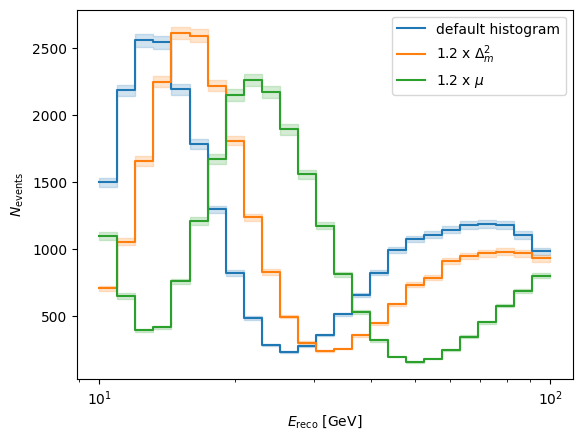

In [14]:
from toy_mc.histogram import plot_histogram

fig, ax = plt.subplots()

plot_histogram(h0, ax=ax, label=r'default histogram')

plot_histogram(h2, ax=ax, label=r'1.2 x $\Delta_m^2$ ')

plot_histogram(h3, ax=ax, label=r'1.2 x $\mu$')


plt.xscale('log')
plt.xlabel(r'$E_{\rm reco}$ [GeV]')
plt.ylabel(r'$N_{\rm events}$')

plt.legend()

In [15]:
from surfaces import calculate_probs

In [16]:
reload(generator)
gen_nominal = generator.Generator(
    int(1e5), default_response, default_pars, name="nominal"
)
# It looks like there is a breakdown point where, if the response is *too* different,
# the whole thing doesn't work anymore.
gen_sys_1 = generator.Generator(
    int(1e5),
    generator.Response(1.1 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_01",
)
gen_sys_2 = generator.Generator(
    int(1e5),
    generator.Response(0.90 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_02",
)
gen_sys_3 = generator.Generator(
    int(1e5),
    generator.Response(0.95 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_03",
)
gen_sys_4 = generator.Generator(
    int(1e5),
    generator.Response(1.05 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_04",
)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [17]:
reload(calculate_probs)
df_with_probs = calculate_probs.calculate_probs_sklearn(
    gen_nominal,
    [gen_sys_1, gen_sys_2, gen_sys_3, gen_sys_4],
    variables=["true_energy", "reco_energy"],
    tilt_bias_correction=True,
    neighbors_per_class=200
)

Starting KNN evaluation on 10 chunks of data...


100%|██████████| 10/10 [01:25<00:00,  8.51s/it]


In [18]:
df_with_probs_no_tilt_corr = calculate_probs.calculate_probs_sklearn(
    gen_nominal,
    [gen_sys_1, gen_sys_2, gen_sys_3, gen_sys_4],
    variables=["true_energy", "reco_energy"],
    tilt_bias_correction=False,
    neighbors_per_class=200
)

Starting KNN evaluation on 10 chunks of data...


100%|██████████| 10/10 [01:02<00:00,  6.23s/it]


In [54]:
reload(calculate_probs)
df_with_probs_mlp = calculate_probs.calculate_probs_sklearn(
    gen_nominal,
    [gen_sys_1, gen_sys_2, gen_sys_3, gen_sys_4],
    variables=["true_energy", "reco_energy"],
    classifiertype="mlp",
    verbose_training=True,
    max_iter=10,
    alpha=1e-7,
    activation="relu",
    hidden_layer_sizes=(20, 20)
)

Iteration 1, loss = 1.13845445
Iteration 2, loss = 1.08604982
Iteration 3, loss = 1.08403529
Iteration 4, loss = 1.08317233
Iteration 5, loss = 1.08282490
Iteration 6, loss = 1.08231550
Iteration 7, loss = 1.08204736
Iteration 8, loss = 1.08186783
Iteration 9, loss = 1.08163777
Iteration 10, loss = 1.08137652
Starting MLP evaluation...


/Users/trettin/projects/ultrasurface paper/ultrasurfaces/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [48]:
df_with_probs_mlp

,true_energy,true_cos(zen),weights_pre_detector,reco_energy,weights,set,prob_nominal,prob_sys_01,prob_sys_02,prob_sys_03,prob_sys_04
0,31.374007,-1.0,0.089302,38.120890,0.089302,nominal,0.214937,0.314162,0.003486,0.045591,0.421825
1,7.825748,-1.0,0.229164,7.622602,0.229164,nominal,0.378925,0.036561,0.086943,0.303728,0.193844
2,35.390873,-1.0,0.181765,52.844779,0.181765,nominal,0.047451,0.668806,0.000128,0.003770,0.279844
3,8.440775,-1.0,0.027634,8.589416,0.027634,nominal,0.382941,0.084311,0.038471,0.203558,0.290720
4,27.984758,-1.0,0.030495,38.445595,0.030495,nominal,0.080716,0.569538,0.000348,0.008365,0.341032
...,...,...,...,...,...,...,...,...,...,...,...
99995,6.927205,-1.0,0.841198,6.304942,0.841198,nominal,0.259609,0.005818,0.247656,0.417835,0.069082
99996,3.982570,-1.0,0.509175,3.988231,0.509175,nominal,0.389516,0.064297,0.049937,0.226919,0.269331
99997,17.164698,-1.0,0.520845,19.293136,0.520845,nominal,0.282388,0.222846,0.007747,0.078965,0.408055
99998,3.207663,-1.0,0.988267,3.186803,0.988267,nominal,0.394139,0.049180,0.061775,0.251242,0.243664


In [28]:
from toy_mc.histogram import Histogram

In [55]:
weighted_hist = Histogram(bin_edges)
weighted_hist.fill(
    df_with_probs["reco_energy"],
    df_with_probs["weights"]
    * df_with_probs["prob_sys_01"]
    / df_with_probs["prob_nominal"],
)

weighted_hist_no_tilt_corr = Histogram(bin_edges)
weighted_hist_no_tilt_corr.fill(
    df_with_probs_no_tilt_corr["reco_energy"],
    df_with_probs_no_tilt_corr["weights"]
    * df_with_probs_no_tilt_corr["prob_sys_01"]
    / df_with_probs_no_tilt_corr["prob_nominal"],
)

weighted_hist_mlp = Histogram(bin_edges)
weighted_hist_mlp.fill(
    df_with_probs_mlp["reco_energy"],
    df_with_probs_mlp["weights"]
    * df_with_probs_mlp["prob_sys_01"]
    / df_with_probs_mlp["prob_nominal"],
)

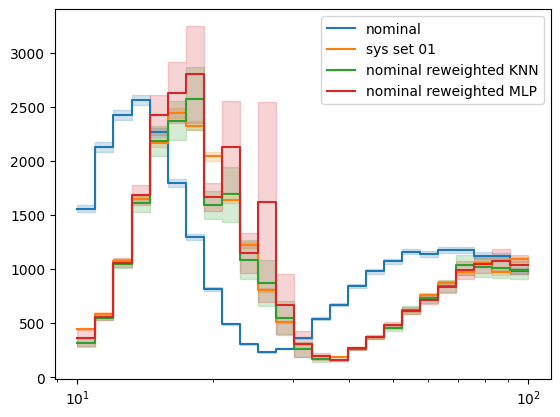

In [57]:
from toy_mc.histogram import plot_histogram

fig, ax = plt.subplots()

sys_hist = gen_sys_1.get_histogram(bin_edges)
nominal_hist = gen_nominal.get_histogram(bin_edges)

plot_histogram(nominal_hist, ax=ax, label="nominal")
plot_histogram(sys_hist, ax=ax, label="sys set 01")
plot_histogram(weighted_hist, ax=ax, label="nominal reweighted KNN")
# plot_histogram(weighted_hist_no_tilt_corr, ax=ax, label="without tilt corr")
plot_histogram(weighted_hist_mlp, ax=ax, label="nominal reweighted MLP")
plt.semilogx()
plt.legend()
plt.show()

In [53]:
from surfaces import calculate_grads
reload(calculate_grads)

<module 'surfaces.calculate_grads' from '/Users/trettin/Documents/ultrasurfaces/surfaces/calculate_grads.py'>

In [54]:
# get gradient names for systematic "mu"
grad_names = calculate_grads.make_gradient_names(["mu"], 2)
grad_names

['grad__mu', 'grad__mu__mu']

In [56]:
# make delta_p matrix for the systematic "mu" 
# (i.e. the detector response)
delta_p = calculate_grads.make_delta_p_from_grad_names(
    grad_names, [gen_sys_1, gen_sys_2, gen_sys_3, gen_sys_4], gen_nominal
)
delta_p

array([[ 0.    ,  0.1   , -0.1   , -0.05  ,  0.05  ],
       [ 0.    ,  0.01  ,  0.01  ,  0.0025,  0.0025]])

In [57]:
# reload(calculate_grads)
df_with_grads = calculate_grads.fit_gradients(
    df_with_probs, prob_columns=["prob_nominal", "prob_sys_01", "prob_sys_02", "prob_sys_03", "prob_sys_04"], delta_p=delta_p, grad_names=grad_names
)

100%|██████████| 100000/100000 [00:20<00:00, 4856.43it/s]


In [59]:
from surfaces import calculate_grad_net

2023-03-01 17:13:43.990130: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [72]:
reload(calculate_grad_net)

<module 'surfaces.calculate_grad_net' from '/Users/trettin/projects/ultrasurface paper/ultrasurfaces/surfaces/calculate_grad_net.py'>

In [82]:
df_grad_net = calculate_grad_net.run_grad_net(
    gen_nominal,
    [gen_sys_1, gen_sys_2, gen_sys_3, gen_sys_4],
    variables=["true_energy", "reco_energy"],
    param_names=["mu"],
    verbose=1,
    epochs=30,
)

Epoch 1/30
500/500 [==============================] - 6s 9ms/step - loss: 1.2792
Epoch 2/30
500/500 [==============================] - 4s 8ms/step - loss: 1.1020
Epoch 3/30
500/500 [==============================] - 4s 9ms/step - loss: 1.0935
Epoch 4/30
500/500 [==============================] - 5s 10ms/step - loss: 1.0919
Epoch 5/30
500/500 [==============================] - 5s 10ms/step - loss: 1.0908
Epoch 6/30
500/500 [==============================] - 8s 17ms/step - loss: 1.0904
Epoch 7/30
500/500 [==============================] - 7s 15ms/step - loss: 1.0899
Epoch 8/30
500/500 [==============================] - 7s 13ms/step - loss: 1.0895
Epoch 9/30
500/500 [==============================] - 7s 13ms/step - loss: 1.0895
Epoch 10/30
500/500 [==============================] - 7s 13ms/step - loss: 1.0889
Epoch 11/30
500/500 [==============================] - 6s 12ms/step - loss: 1.0886
Epoch 12/30
500/500 [==============================] - 11s 21ms/step - loss: 1.0885
Epoch 13/30
500

In [83]:
df_grad_net

,true_energy,true_cos(zen),weights_pre_detector,reco_energy,weights,set,prob_nominal,prob_sys_01,prob_sys_02,prob_sys_03,prob_sys_04,grad__mu,grad__mu__mu
0,31.374007,-1.0,0.089302,38.120890,0.089302,nominal,0.235246,0.285522,0.003469,0.047236,0.428526,22.051861,-201.149948
1,7.825748,-1.0,0.229164,7.622602,0.229164,nominal,0.389135,0.028500,0.092667,0.315005,0.174693,-5.895605,-202.447357
2,35.390873,-1.0,0.181765,52.844779,0.181765,nominal,0.053070,0.637331,0.000075,0.003318,0.306206,45.249172,-203.923615
3,8.440775,-1.0,0.027634,8.589416,0.027634,nominal,0.402649,0.068015,0.040922,0.213355,0.275059,2.540293,-203.237045
4,27.984758,-1.0,0.030495,38.445595,0.030495,nominal,0.090257,0.535840,0.000261,0.008064,0.365578,38.140976,-203.292435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6.927205,-1.0,0.841198,6.304942,0.841198,nominal,0.254636,0.004534,0.260091,0.424669,0.056070,-20.247059,-200.350815
99996,3.982570,-1.0,0.509175,3.988231,0.509175,nominal,0.381630,0.062225,0.066767,0.248999,0.240380,-0.352268,-177.847366
99997,17.164698,-1.0,0.520845,19.293136,0.520845,nominal,0.307092,0.194318,0.008214,0.083625,0.406750,15.818556,-203.950562
99998,3.207663,-1.0,0.988267,3.186803,0.988267,nominal,0.359390,0.056824,0.095815,0.275673,0.212298,-2.612270,-158.321899


In [75]:
# generate a histogram by weighting the nominal events to any detector response using the gradients in the dataframe
def generate_histogram_at_response(df, nominal_response, response, bin_edges, use_systs=None, variable="reco_energy"):
    """Generate a histogram at a given detector response.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing the events and gradients
    nominal_response : toy_mc.generator.Response
        Nominal detector response
    response : toy_mc.generator.Response
        Detector response to weight the events to
    bin_edges : np.ndarray
        Bin edges for the histogram
    use_systs : list of str, optional
        List of systematic names to use. If None, all systematics are used.
    variable : str, optional
        Variable to use for the histogram. Default is "reco_energy".
    """
    if use_systs is None:
        grad_names = df.columns[df.columns.str.startswith("grad__")]
    else:
        grad_names = ["grad_{}".format(syst) for syst in use_systs]
    delta_p = np.ones(len(grad_names))
    for i, grad_name in enumerate(grad_names):
        for param in grad_name.split("grad")[-1].split("__")[1:]:
            delta_p[i] *= getattr(response, param) - getattr(nominal_response, param)
    weights = df["weights"] * np.exp(np.dot(df[grad_names], delta_p))
    hist = Histogram(bin_edges)
    hist.fill(df[variable], weights)
    return hist

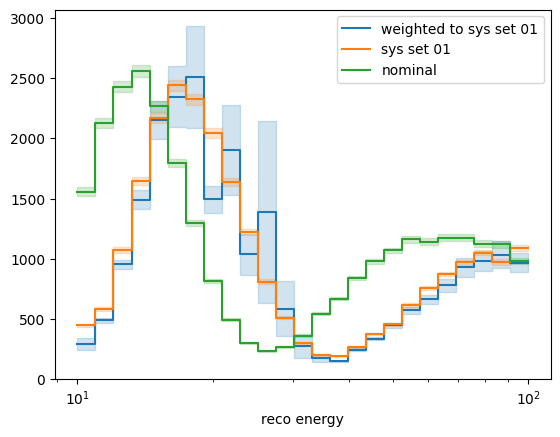

In [86]:
# generate a histogram at the response of sys set 01 using gradients

hist_at_sys_01 = generate_histogram_at_response(df_grad_net, default_response, gen_sys_1.detector_response, bin_edges)
sys_hist = gen_sys_1.get_histogram(bin_edges)
nominal_hist = gen_nominal.get_histogram(bin_edges)

# plot the histograms
fig, ax = plt.subplots()
plot_histogram(hist_at_sys_01, ax=ax, label="weighted to sys set 01")
plot_histogram(sys_hist, ax=ax, label="sys set 01")
plot_histogram(nominal_hist, ax=ax, label="nominal")
plt.xlabel("reco energy")
plt.semilogx()
plt.legend()
plt.show()

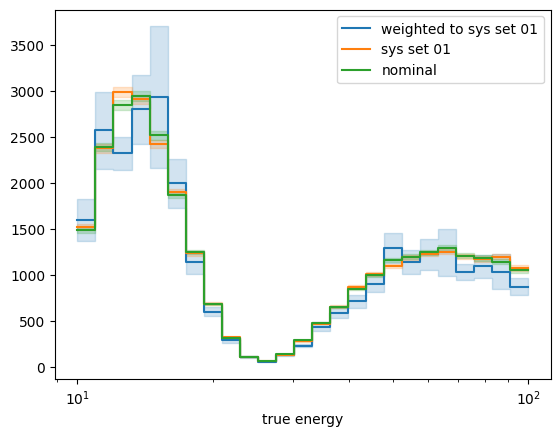

In [87]:
hist_at_sys_01 = generate_histogram_at_response(
    df_grad_net, default_response, gen_sys_1.detector_response, bin_edges, variable="true_energy"
)
sys_hist = gen_sys_1.get_histogram(bin_edges, variable="true_energy")
nominal_hist = gen_nominal.get_histogram(bin_edges, variable="true_energy")

# plot the histograms
fig, ax = plt.subplots()
plot_histogram(hist_at_sys_01, ax=ax, label="weighted to sys set 01")
plot_histogram(sys_hist, ax=ax, label="sys set 01")
plot_histogram(nominal_hist, ax=ax, label="nominal")
plt.xlabel("true energy")
plt.semilogx()
plt.legend()
plt.show()

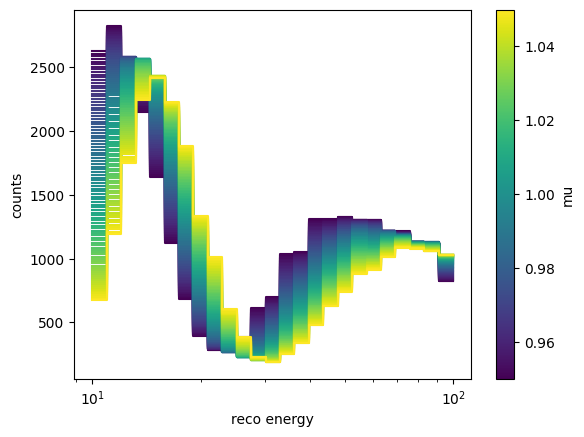

In [81]:
# sweep response parameter mu around nominal value and plot the histograms
mus = np.linspace(0.95, 1.05, 100)
hists = []
for mu in mus:
    response = generator.Response(mu * default_response.mu, default_response.sigma)
    hists.append(generate_histogram_at_response(df_grad_net, default_response, response, bin_edges))

fig, ax = plt.subplots()
# make list of colors from a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(mus)))
for hist, mu, color in zip(hists, mus, colors):
    plot_histogram(hist, ax=ax, show_errorband=False, label="mu = {}".format(mu), color=color)
# make colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=mus.min(), vmax=mus.max()))
sm._A = []
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("mu")
plt.xlabel("reco energy")
plt.ylabel("counts")
plt.semilogx()
plt.show()
